In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import math
import numpy as np
from scipy.stats import rankdata, randint
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
brca_file = '/content/drive/Shareddrives/CSCI5461 Project/BRCA Data/brca_data.csv'

In [4]:
brca_df = pd.read_csv(brca_file)
brca_df

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179521,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.000000,5.004281,12.817877,10.854036,11.293350,4.143573,0.926986,5.818401,12.950524,12.552395,...,-0.993249,0.131803,-0.012965,0.306601,0.344012,0,NaN,NaN,NaN,infiltrating lobular carcinoma
701,2.241901,4.867086,8.875779,5.641164,11.940969,3.149715,4.101322,9.272752,5.335362,6.974459,...,-0.502791,-0.674763,0.165243,-0.338279,0.487583,1,NaN,NaN,NaN,infiltrating lobular carcinoma
702,3.260718,6.700652,14.299072,8.443970,12.312343,11.846810,2.148544,10.435503,3.498442,8.011837,...,0.669064,0.110822,-0.170345,-0.232004,-0.165477,1,NaN,NaN,NaN,infiltrating lobular carcinoma
703,11.766777,6.656791,13.638154,10.618453,13.775750,6.649667,7.340151,9.903519,9.922855,9.360980,...,0.053346,-0.455617,-0.219365,-0.103807,-0.109356,0,NaN,NaN,NaN,infiltrating lobular carcinoma


In [5]:
outcome_cols = ["vital.status", "PR.Status", "ER.Status",	"HER2.Final.Status",	"histological.type"]

In [6]:
brca_df['vital.status'] = np.where((brca_df['vital.status'] == 0),'survived', brca_df['vital.status'])
brca_df['vital.status'] = np.where((brca_df['vital.status'] != 'survived'),'died', brca_df['vital.status'])

brca_df['vital.status'].value_counts()

survived    611
died         94
Name: vital.status, dtype: int64

In [7]:
brca_omics_data = brca_df.copy()

#remove outcome cols
brca_omics_data = brca_omics_data.drop(outcome_cols, axis=1)

In [8]:
brca_omics_data.describe()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT157,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,4.547197,6.487979,9.516678,7.351940,8.179439,7.806726,5.677454,8.721931,7.450675,7.747601,...,0.001072,0.008589,0.004734,0.059332,-0.094355,0.109583,-0.028409,0.048929,-0.002065,0.019180
std,4.971708,4.874769,4.758348,4.248440,4.291915,4.325965,4.331351,4.130467,4.244499,4.245585,...,0.238586,0.254308,0.302194,0.544589,0.579644,0.811079,0.555587,0.377429,0.345646,0.291446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.294314,-0.918200,-1.432959,-1.637550,-3.017238,-2.646594,-2.152630,-0.751501,-1.334300,-1.182336
25%,0.000000,2.297602,5.937361,3.842758,5.144707,4.612299,1.436695,5.784499,4.171967,4.688113,...,-0.085966,-0.141888,-0.168875,-0.276563,-0.302937,-0.426244,-0.317636,-0.207172,-0.232004,-0.147140
50%,2.379261,6.002963,10.011822,7.701500,9.043774,7.530813,5.866248,9.305378,7.999344,8.277510,...,-0.003071,-0.022655,0.006428,0.084549,-0.067906,-0.005234,-0.067527,-0.039654,-0.010013,0.006341
75%,8.025802,9.503384,13.087360,10.493654,11.536532,11.157128,10.132437,11.948430,10.559780,10.785635,...,0.081854,0.136848,0.183828,0.413358,0.180853,0.573340,0.206411,0.211573,0.212412,0.172476
max,17.432087,20.960773,20.978437,19.979807,17.338611,19.132935,14.702210,18.662764,17.355330,17.892925,...,1.335318,1.051862,1.483391,2.349841,2.069048,3.043258,2.475027,1.664292,1.545965,1.062551


<Axes: >

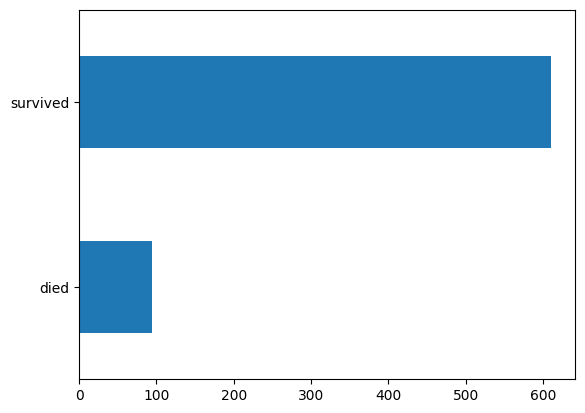

In [9]:
brca_df['vital.status'].value_counts().sort_values().plot(kind = 'barh')

<Axes: >

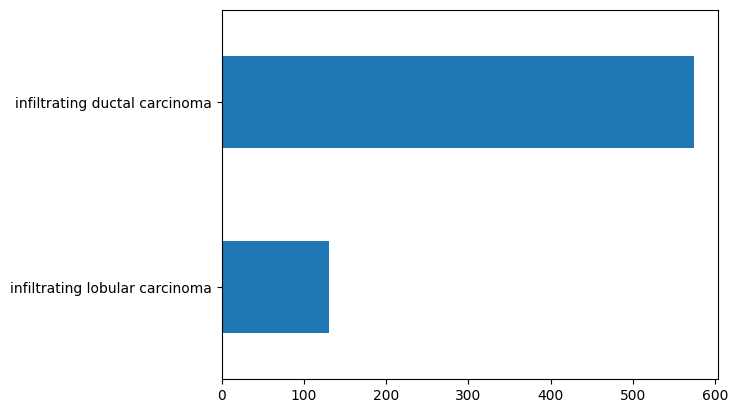

In [10]:
brca_df['histological.type'].value_counts().sort_values().plot(kind = 'barh')

<Axes: ylabel='histological.type'>

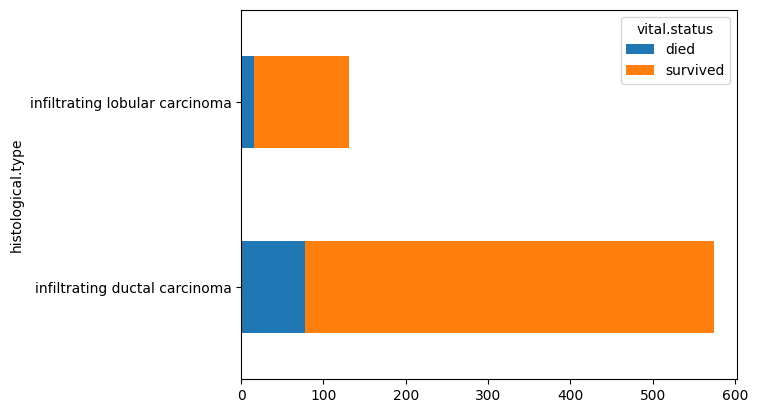

In [11]:
brca_df.groupby(['histological.type', 'vital.status']).size().unstack().plot(kind='barh', stacked=True)

# **Quant Normalization**

In [12]:
class Normalization:
    def quantile_normalize(self, df):
        """
        input: dataframe with numerical columns
        output: dataframe with quantile normalized values
        """
        # Order values in each column
        df_sorted = pd.DataFrame(np.sort(df.values, axis=0), index=df.index, columns=df.columns)
        df_mean = df_sorted.mean(axis=1) # Compute Row Means
        df_mean.index = np.arange(1, len(df_mean) + 1)
        df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack() # Use Average Values to each sample in the original order
        return df_qn

In [13]:
normalization = Normalization()
brca_omics_data_qn = normalization.quantile_normalize(brca_omics_data)
brca_omics_data_qn

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT157,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363
0,1.128537,1.741135,2.735793,2.452789,3.308355,1.382312,2.756276,1.847722,2.288664,2.190268,...,1.342387,1.439681,1.524971,2.519342,0.479967,0.237463,0.631606,0.888222,1.684881,0.466819
1,-0.938097,1.072500,3.988606,4.394250,1.817956,2.091916,1.983784,1.266930,0.105896,0.209132,...,0.888222,0.214247,2.635413,3.988606,1.573698,2.022999,2.642143,1.046428,1.266930,2.856140
2,1.797161,1.194618,1.468180,1.066951,2.675620,2.509213,2.749932,0.550022,3.034342,2.961016,...,1.674077,1.734043,0.938367,2.221653,0.564197,1.937022,2.675620,0.815388,0.763911,0.534510
3,-0.938097,4.155766,4.888495,3.947744,3.855147,1.904515,2.772161,3.204560,1.667296,1.839195,...,1.388233,2.038812,-0.053549,3.225334,2.185496,1.124768,1.545646,-0.323420,3.665196,1.295199
4,-0.938097,1.233711,3.475985,3.257359,1.536169,1.801360,4.757634,0.978833,0.759512,0.875364,...,0.769768,1.281641,2.563599,3.822471,1.993559,0.656014,1.289234,3.204560,1.248950,1.778316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-0.938097,1.320793,2.278926,2.541826,2.323050,0.573515,0.277222,0.714432,3.422213,3.191852,...,1.753189,-0.060253,1.124768,2.168335,-0.623317,-0.104771,2.181347,1.681382,2.749932,3.152791
701,1.524971,1.285177,1.281641,1.133142,2.598880,0.277222,1.445777,1.568521,0.992666,1.197989,...,1.638412,3.106385,0.837636,2.096512,0.020865,0.544165,-0.005723,2.251188,0.295527,3.576605
702,1.717615,1.770402,2.805370,1.774495,2.783827,2.648336,1.183622,1.881518,0.569213,1.499789,...,1.993559,1.309912,1.688291,-0.046997,2.525885,2.533846,2.125574,0.965119,0.707385,0.622972
703,3.106385,1.757996,2.570022,2.459467,3.610627,1.388233,1.825798,1.734043,2.209802,1.916769,...,0.978833,0.415911,4.494200,1.057862,1.345754,1.681382,0.340573,0.631606,1.219486,0.958024


In [14]:
omics_cols = list(brca_omics_data_qn.columns)

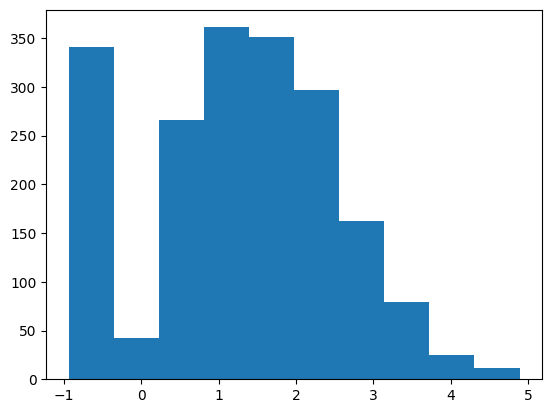

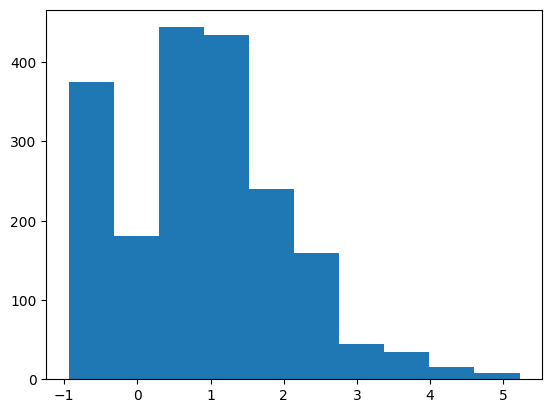

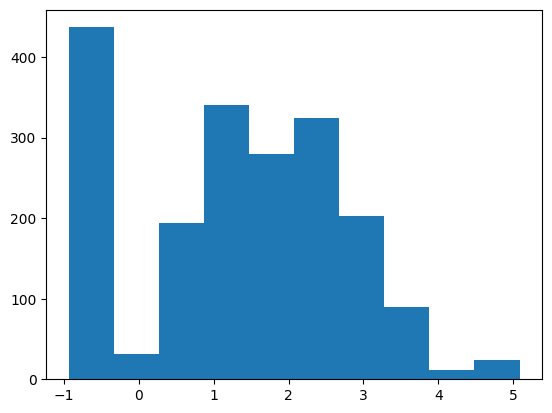

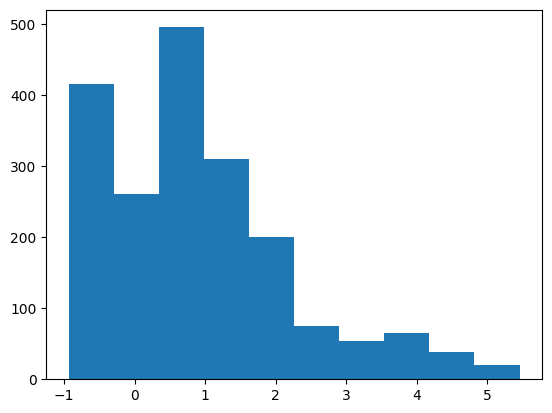

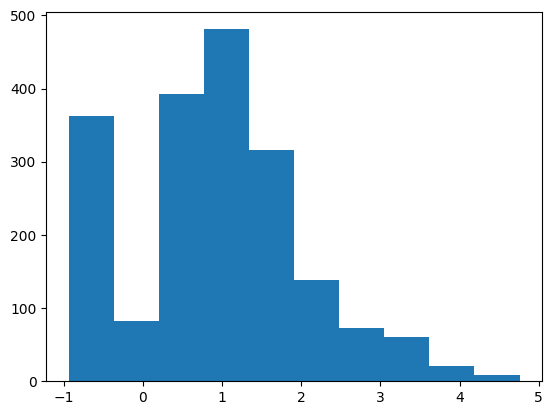

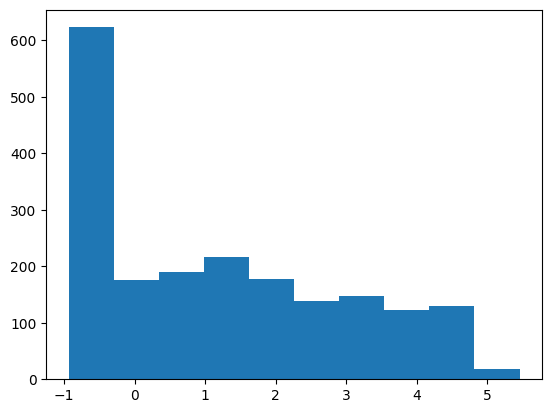

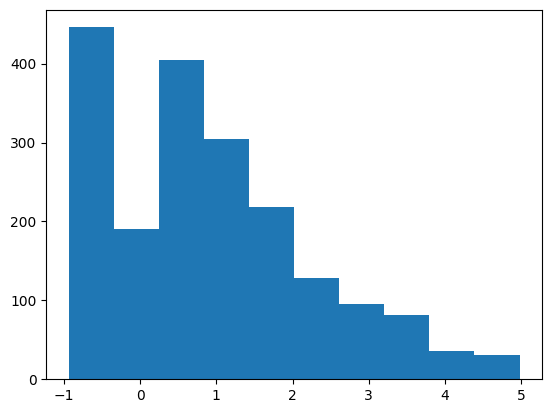

In [15]:
# Plotting normalized data, most of the plots look generally the same/same shape.
plt.hist(brca_omics_data_qn.iloc[0, 0:])
plt.show()
plt.hist(brca_omics_data_qn.iloc[1, 0:])
plt.show()
plt.hist(brca_omics_data_qn.iloc[2, 0:])
plt.show()
plt.hist(brca_omics_data_qn.iloc[3, 0:])
plt.show()
plt.hist(brca_omics_data_qn.iloc[4, 0:])
plt.show()
plt.hist(brca_omics_data_qn.iloc[5, 0:])
plt.show()
plt.hist(brca_omics_data_qn.iloc[6, 0:])
plt.show()

In [16]:
brca_omics_data_qn.describe()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT157,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,1.355540,1.614996,1.632008,1.622115,1.607329,1.625894,1.609577,1.625901,1.620146,1.612866,...,1.640390,1.640438,1.640435,1.640443,1.640443,1.640443,1.640437,1.640381,1.640443,1.640443
std,1.585340,1.260878,1.230429,1.248392,1.273984,1.241609,1.270173,1.241607,1.251882,1.264557,...,1.214221,1.214221,1.214222,1.214221,1.214221,1.214221,1.214221,1.214215,1.214221,1.214221
min,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,...,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097,-0.938097
25%,-0.938097,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,...,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385,0.707385
50%,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,...,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741,1.587741
75%,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,...,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913,2.398913
max,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,...,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390,5.460390


In [17]:
brca_omics_data_qn["vital_status"] = brca_df["vital.status"].values

# **KNN**

*Imbalanced data*

In [18]:
# train_knn, test_knn = train_test_split(brcaVsRest, test_size=0.2, random_state=1)

y = brca_omics_data_qn['vital_status']
X = brca_omics_data_qn[omics_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=53) # 80% training and 20% test

#Create a knn Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = knn.predict(X_test)

report = classification_report(y_test, y_pred_svm, output_dict=True)

report


{'died': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14},
 'survived': {'precision': 0.900709219858156,
  'recall': 1.0,
  'f1-score': 0.9477611940298507,
  'support': 127},
 'accuracy': 0.900709219858156,
 'macro avg': {'precision': 0.450354609929078,
  'recall': 0.5,
  'f1-score': 0.47388059701492535,
  'support': 141},
 'weighted avg': {'precision': 0.811277098737488,
  'recall': 0.900709219858156,
  'f1-score': 0.8536572456864613,
  'support': 141}}

# **Clustering**

In [19]:
import seaborn as sns

heatmap_data = pd.pivot_table(brca_omics_data_qn, index=['vital_status'])

heatmap_data

,cn_A2ML1,cn_ABAT,cn_ABCA10,cn_ABCA4,cn_ABCA6,cn_ABCA8,cn_ABCA9,cn_ABCB5,cn_ABCC11,cn_ABCC12,...,rs_WDR72,rs_WFDC2,rs_WIF1,rs_WNK4,rs_WT1,rs_ZBTB16,rs_ZFP57,rs_ZIC1,rs_ZIC2,rs_ZNF385B
vital_status,,,,,,,,,,,,,,,,,,,,,
died,0.803264,1.016902,0.939740,0.476905,0.934894,0.999754,0.950252,0.714932,0.909126,0.932586,...,1.519027,1.512653,1.837143,1.644305,1.302511,2.133963,1.576398,1.662231,1.744064,1.555035
survived,0.711963,0.773674,0.860889,0.816988,0.882710,0.877406,0.877128,0.734191,0.744338,0.777503,...,1.527622,1.660103,1.383588,1.639601,1.643336,1.544472,1.501079,1.527970,1.509882,1.652899


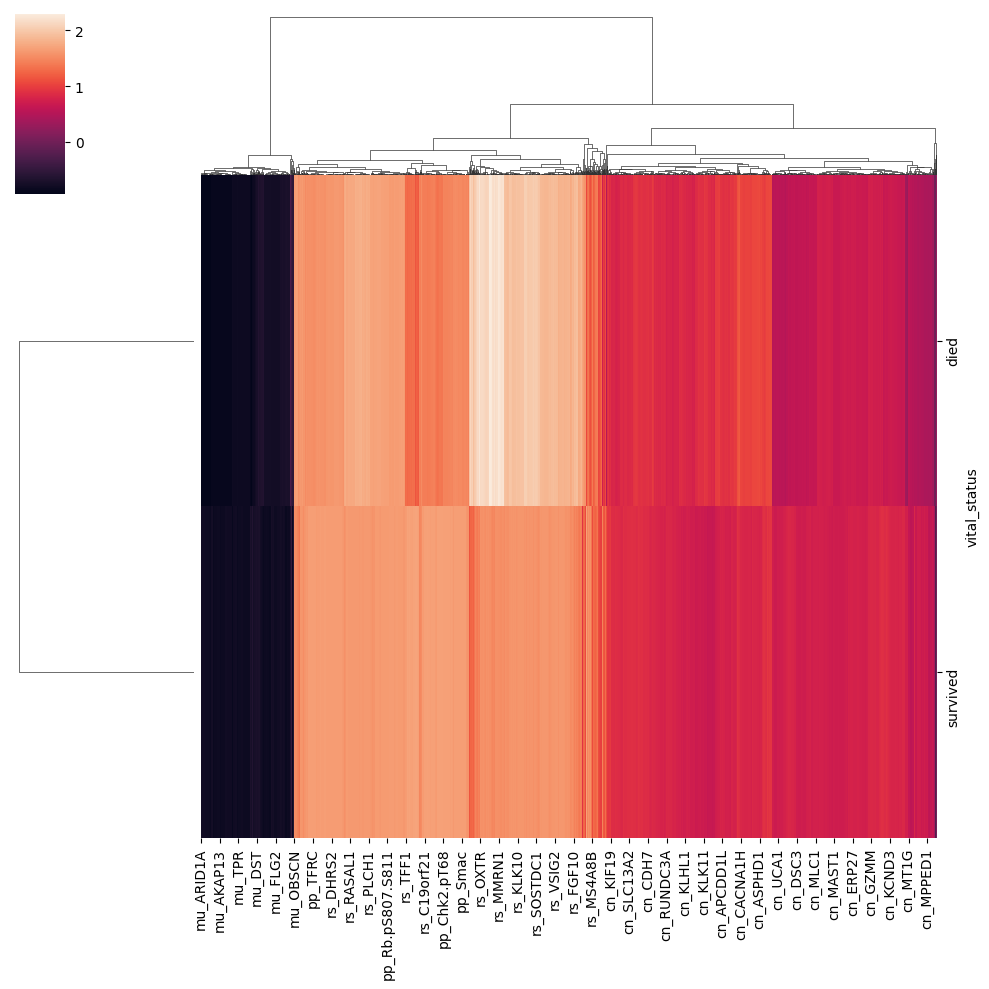

In [20]:
sns.clustermap(heatmap_data)

# **SVM**

*Imbalanced data*

In [21]:
# train_svm, test_svm = train_test_split(brcaVsRest, test_size=0.2, random_state=1)

y = brca_omics_data_qn['vital_status']
X = brca_omics_data_qn[omics_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=53) # 80% training and 20% test

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

report = classification_report(y_test, y_pred_svm, output_dict=True)

report

{'died': {'precision': 0.26666666666666666,
  'recall': 0.2857142857142857,
  'f1-score': 0.2758620689655172,
  'support': 14},
 'survived': {'precision': 0.9206349206349206,
  'recall': 0.9133858267716536,
  'f1-score': 0.9169960474308301,
  'support': 127},
 'accuracy': 0.851063829787234,
 'macro avg': {'precision': 0.5936507936507937,
  'recall': 0.5995500562429696,
  'f1-score': 0.5964290581981736,
  'support': 141},
 'weighted avg': {'precision': 0.8557019025104131,
  'recall': 0.851063829787234,
  'f1-score': 0.853337354533565,
  'support': 141}}

<Axes: >

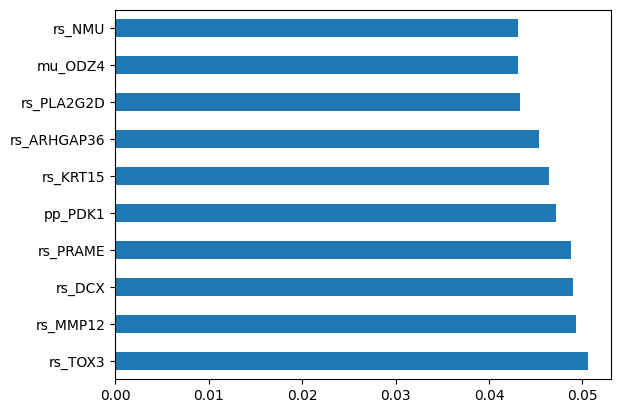

In [22]:
pd.Series(abs(clf.coef_[0]), index=omics_cols).nlargest(10).plot(kind='barh') #the 10 most important features in classification

# **Naive Bayes**

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train)
X_test_nb = scaler.fit_transform(X_test)

In [24]:
#Training on unbalanced data set
nb1 = MultinomialNB().fit(X_train_nb, y_train)

y_pred_nb1 = nb1.predict(X_test_nb)

report = classification_report(y_test, y_pred_nb1, output_dict=True)

report

{'died': {'precision': 0.375,
  'recall': 0.6428571428571429,
  'f1-score': 0.4736842105263159,
  'support': 14},
 'survived': {'precision': 0.9572649572649573,
  'recall': 0.8818897637795275,
  'f1-score': 0.9180327868852459,
  'support': 127},
 'accuracy': 0.8581560283687943,
 'macro avg': {'precision': 0.6661324786324787,
  'recall': 0.7623734533183353,
  'f1-score': 0.6958584987057809,
  'support': 141},
 'weighted avg': {'precision': 0.8994514154088623,
  'recall': 0.8581560283687943,
  'f1-score': 0.87391307008365,
  'support': 141}}

# **ANN**

In [25]:
from sklearn.neural_network import MLPClassifier
ann_1 = MLPClassifier(hidden_layer_sizes = (500, 250, 100), 
                    random_state = 1, max_iter = 50, verbose = True).fit(X_train, y_train)

y_pred_ann = ann_1.predict(X_test)

report = classification_report(y_test, y_pred_ann, output_dict=True)

report

Iteration 1, loss = 1.31911852
Iteration 2, loss = 0.52109265
Iteration 3, loss = 0.52701840
Iteration 4, loss = 0.43308078
Iteration 5, loss = 0.44229275
Iteration 6, loss = 0.39404631
Iteration 7, loss = 0.37050112
Iteration 8, loss = 0.33281813
Iteration 9, loss = 0.31256474
Iteration 10, loss = 0.29883032
Iteration 11, loss = 0.27900092
Iteration 12, loss = 0.26655122
Iteration 13, loss = 0.24686093
Iteration 14, loss = 0.22657270
Iteration 15, loss = 0.22326853
Iteration 16, loss = 0.20363465
Iteration 17, loss = 0.16084347
Iteration 18, loss = 0.17969984
Iteration 19, loss = 0.14831829
Iteration 20, loss = 0.16399002
Iteration 21, loss = 0.19661622
Iteration 22, loss = 0.12163767
Iteration 23, loss = 0.11690122
Iteration 24, loss = 0.10507930
Iteration 25, loss = 0.10454870
Iteration 26, loss = 0.08492123
Iteration 27, loss = 0.07161239
Iteration 28, loss = 0.05141639
Iteration 29, loss = 0.04696638
Iteration 30, loss = 0.03636274
Iteration 31, loss = 0.03248682
Iteration 32, los

{'died': {'precision': 0.5,
  'recall': 0.42857142857142855,
  'f1-score': 0.4615384615384615,
  'support': 14},
 'survived': {'precision': 0.937984496124031,
  'recall': 0.952755905511811,
  'f1-score': 0.9453125,
  'support': 127},
 'accuracy': 0.900709219858156,
 'macro avg': {'precision': 0.7189922480620154,
  'recall': 0.6906636670416197,
  'f1-score': 0.7034254807692307,
  'support': 141},
 'weighted avg': {'precision': 0.8944966738138436,
  'recall': 0.900709219858156,
  'f1-score': 0.8972781983087834,
  'support': 141}}

### *ANN Hyper Parameter Optimization*

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Defining a function to find the best parameters for ANN
mlp = MLPClassifier(max_iter=50)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (100,100,100), (200,200,200), (500, 500, 500)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.08],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.08, 'hidden_layer_sizes': (500, 500, 500), 'learning_rate': 'constant', 'solver': 'sgd'}


In [28]:
#running ANN with tuned params
y_pred_ann_tuned = clf.predict(X_test)

report = classification_report(y_test, y_pred_ann_tuned, output_dict=True)

report

{'died': {'precision': 0.2,
  'recall': 0.07142857142857142,
  'f1-score': 0.10526315789473682,
  'support': 14},
 'survived': {'precision': 0.9044117647058824,
  'recall': 0.968503937007874,
  'f1-score': 0.935361216730038,
  'support': 127},
 'accuracy': 0.8794326241134752,
 'macro avg': {'precision': 0.5522058823529412,
  'recall': 0.5199662542182227,
  'f1-score': 0.5203121873123874,
  'support': 141},
 'weighted avg': {'precision': 0.8344701710471423,
  'recall': 0.8794326241134752,
  'f1-score': 0.8529401328740506,
  'support': 141}}

# **Decision Trees**

In [29]:
#Create a decision tree Classifier
clf_dt = DecisionTreeClassifier(criterion="entropy", max_depth=70) 

#Train the model using the training sets
clf_dt.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = clf_dt.predict(X_test)

report = classification_report(y_test, y_pred_dt, output_dict=True)

report

{'died': {'precision': 0.13043478260869565,
  'recall': 0.21428571428571427,
  'f1-score': 0.16216216216216214,
  'support': 14},
 'survived': {'precision': 0.9067796610169492,
  'recall': 0.84251968503937,
  'f1-score': 0.873469387755102,
  'support': 127},
 'accuracy': 0.7801418439716312,
 'macro avg': {'precision': 0.5186072218128224,
  'recall': 0.5284026996625422,
  'f1-score': 0.5178157749586321,
  'support': 141},
 'weighted avg': {'precision': 0.8296957723806686,
  'recall': 0.7801418439716312,
  'f1-score': 0.8028431384054483,
  'support': 141}}

<Axes: >

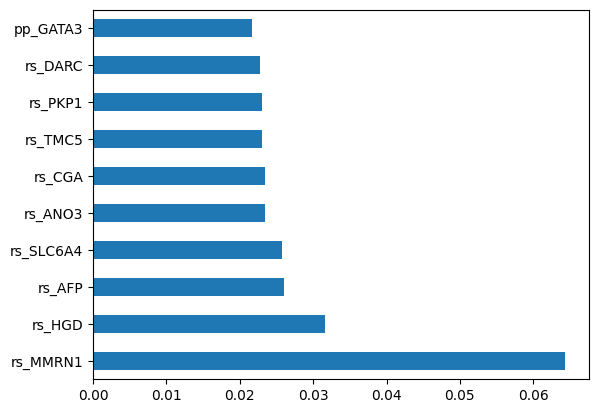

In [30]:
feat_importance = list(clf_dt.tree_.compute_feature_importances(normalize=False))
pd.Series(feat_importance, index=omics_cols).nlargest(10).plot(kind='barh') #the 10 most important features in classification

# **Random Forest**

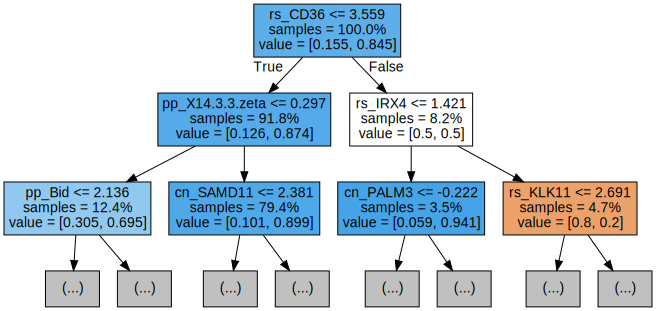

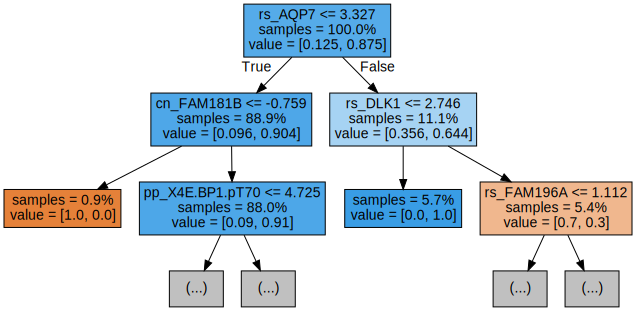

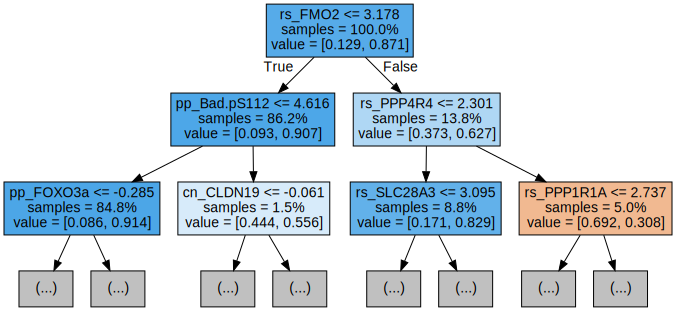

{'died': {'precision': 0.75,
  'recall': 0.3157894736842105,
  'f1-score': 0.44444444444444436,
  'support': 19},
 'survived': {'precision': 0.9230769230769231,
  'recall': 0.9873417721518988,
  'f1-score': 0.9541284403669724,
  'support': 158},
 'accuracy': 0.9152542372881356,
 'macro avg': {'precision': 0.8365384615384616,
  'recall': 0.6515656229180546,
  'f1-score': 0.6992864424057084,
  'support': 177},
 'weighted avg': {'precision': 0.904498044328553,
  'recall': 0.9152542372881356,
  'f1-score': 0.8994165989967575,
  'support': 177}}

In [31]:
y = brca_omics_data_qn['vital_status']
X = brca_omics_data_qn[omics_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=53) # 80% training and 20% test
rf = RandomForestClassifier(random_state = 53)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)


# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }


# grid_search = GridSearchCV(RandomForestClassifier(),
#                            param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

report